**RANDOM FORESET ALGORITHM**

**Random Forest creates multiple decision trees using random subsets of the training data and features. It aggregates the predictions of these trees through majority voting (for classification) or averaging (for regression). Refer bagging for detailed explanation (https://github.com/jerindelbin/Machine_Learning/blob/main/Diabetes%20Prediction%20-%20Bagging/Diabetes%20Prediction%20-%20Bagging.ipynb).**

**ADVANTAGES AND DISADVANTAGES:**

**1. Higher accuracy because multiple predictions are combined. The randomness in bootstrap sampling and feature selection helps in reducing overfitting.**

**2. It can handle datasets with a large number of features without significant performance degradation.**

**3. The model can become complex and less interpretable compared to single decision trees. Training and predicting with multiple trees can be computationally intensive and require more memory.**

**4. 
While it reduces variance compared to individual decision trees, it may still retain some bias from those trees.**    

** **

**An ML project that forecast employee attrition at a company.**

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
attrition = pd.read_csv('D:/Code/Python Projects/Employee Attrition/Dataset01-Employee_Attrition.csv')

**Dataset Head:**

In [3]:
attrition.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
attrition.shape

(14999, 10)

**Check to see if there are duplicate values, subsequently remove**

In [5]:
duplicates = attrition[attrition.duplicated()]
duplicates.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317     

In [6]:
attrition_final = attrition.drop_duplicates()
attrition_final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [7]:
attrition_final.shape

(11991, 10)

**Calculate how many employees left, and how many stayed**

In [8]:
attrition_final['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

**Plot graphs for few feature variables against target variable to see how they vary wrt each other and possibly find trends**

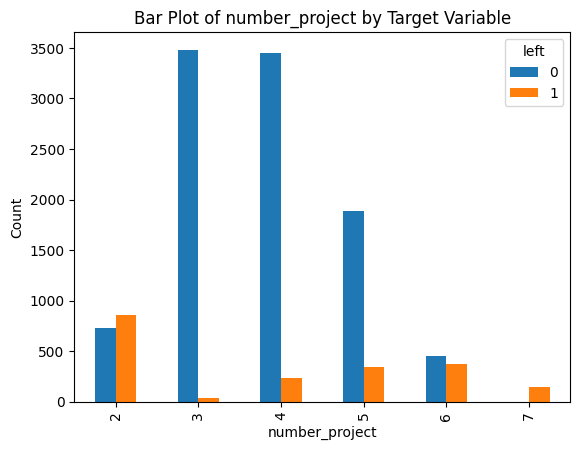

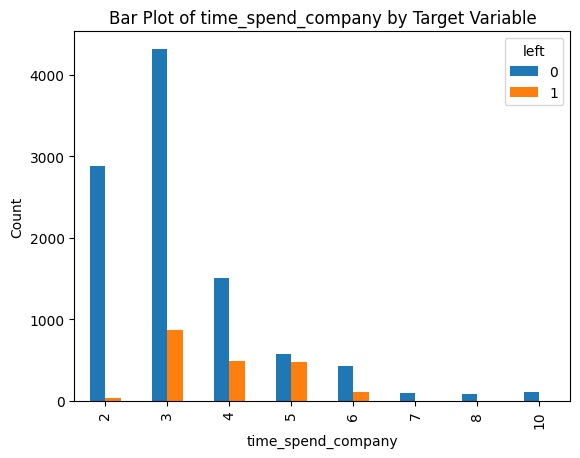

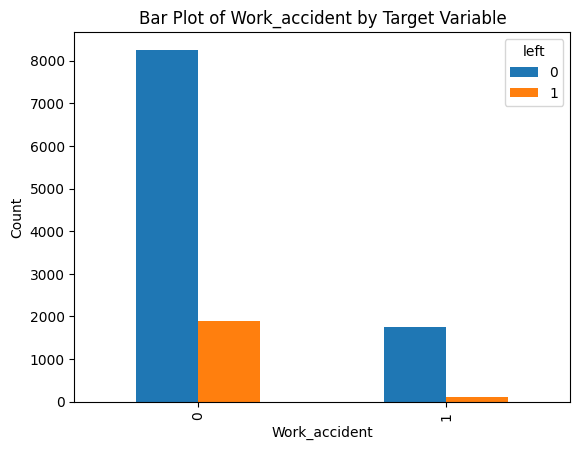

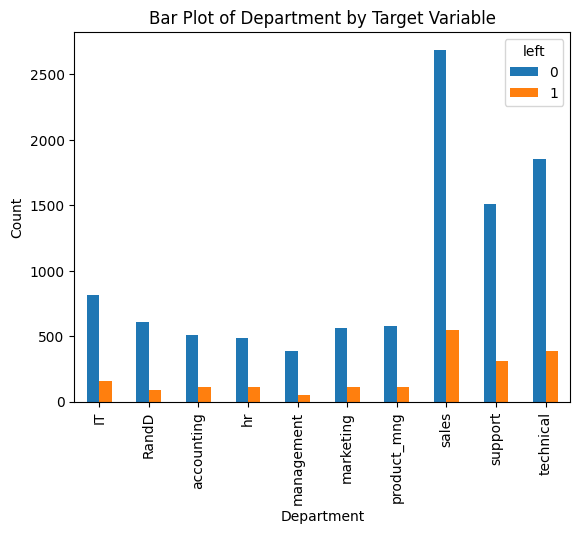

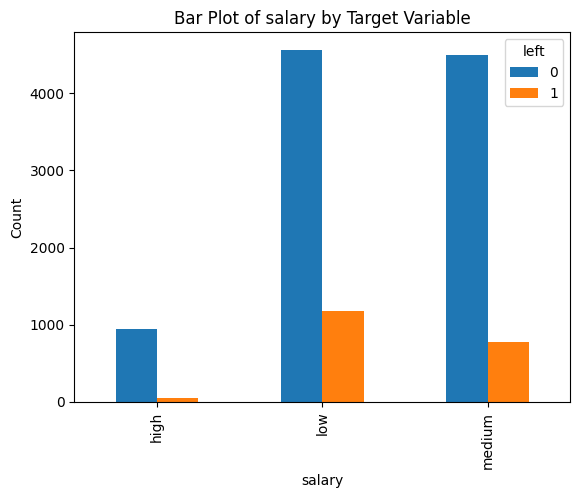

In [9]:
target = attrition_final['left']
features = ['number_project','time_spend_company','Work_accident', 'Department', 'salary']
for column in features:
    if column != 'left':  # Skip the target variable itself
        pd.crosstab(attrition_final[column], target).plot(kind='bar', stacked=False)
        plt.xlabel(column)  
        plt.ylabel('Count')  
        plt.title(f"Bar Plot of {column} by Target Variable") 
        plt.show()
    
#pd.crosstab(attrition_final['salary'], target).plot(kind='bar')

**Convert categorical values ['Department', 'salary'] to numerical values using encoder**

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
attrition_final['salary'] = encoder.fit_transform(attrition_final['salary'])
attrition_final['Department'] = encoder.fit_transform(attrition_final['Department'])

C:\Users\Jerin\AppData\Local\Temp\ipykernel_30596\2913089340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_final['salary'] = encoder.fit_transform(attrition_final['salary'])
C:\Users\Jerin\AppData\Local\Temp\ipykernel_30596\2913089340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_final['Department'] = encoder.fit_transform(attrition_final['Department'])


**^This is just a warning informing us that we are using an ecoder that will essentially change the values in the dataset we are using and may or may not alter the original values.**

In [12]:
attrition_final.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2        

**Split into target and feature variables**

In [13]:
X = attrition_final.drop('left', axis = 1)
y = attrition_final['left']

**Scale the features**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Split into training and testing sets**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Implement Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

**Predict the value**

In [17]:
y_prediction = model.predict(X_test)

**Perform evaluation of the model**

**1. Confusion Matrix**

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:", cm)

Confusion Matrix: [[1991    7]
 [  40  361]]


**Visualize the confusion matrix to understand how our model performed**

<Axes: >

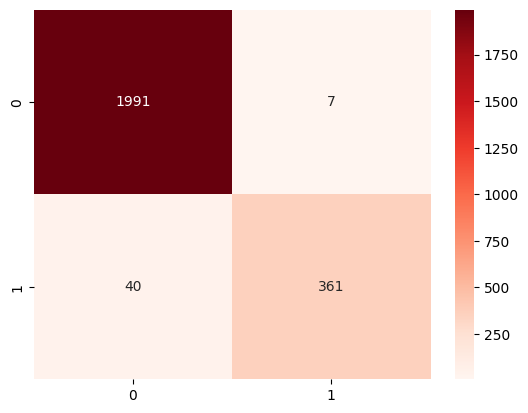

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Reds')

**2. Accuracy:**

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy for this model:", round(accuracy_score(y_test, y_prediction) * 100, 2), "%")

Accuracy for this model: 98.04 %


**3. Precision**

In [21]:
from sklearn.metrics import precision_score
print("Precision for this model:", round(precision_score(y_test, y_prediction) * 100, 2), "%")

Precision for this model: 98.1 %


**4. Recall**

In [22]:
from sklearn.metrics import recall_score
print("Recall for this model:", round(recall_score(y_test, y_prediction) * 100, 2), "%")

Recall for this model: 90.02 %


**5. F1 Score**

In [23]:
from sklearn.metrics import f1_score
print("F1 score for this model:", round(f1_score(y_test, y_prediction) * 100, 2), "%")

F1 score for this model: 93.89 %
